In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
data1 = pd.read_csv("accidents_2005_to_2007.csv")
data2 = pd.read_csv("accidents_2009_to_2011.csv")
data3 = pd.read_csv("accidents_2012_to_2014.csv")
data = pd.concat([data1,data2,data3], axis = 0)

In [12]:
data.shape

(1504150, 33)

In [13]:
data.isnull().sum()

Accident_Index                                       0
Location_Easting_OSGR                              101
Location_Northing_OSGR                             101
Longitude                                          101
Latitude                                           101
Police_Force                                         0
Accident_Severity                                    0
Number_of_Vehicles                                   0
Number_of_Casualties                                 0
Date                                                 0
Day_of_Week                                          0
Time                                               117
Local_Authority_(District)                           0
Local_Authority_(Highway)                            0
1st_Road_Class                                       0
1st_Road_Number                                      0
Road_Type                                            0
Speed_limit                                          0
Junction_D

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1504150 entries, 0 to 464696
Data columns (total 33 columns):
 #   Column                                       Non-Null Count    Dtype  
---  ------                                       --------------    -----  
 0   Accident_Index                               1504150 non-null  object 
 1   Location_Easting_OSGR                        1504049 non-null  float64
 2   Location_Northing_OSGR                       1504049 non-null  float64
 3   Longitude                                    1504049 non-null  float64
 4   Latitude                                     1504049 non-null  float64
 5   Police_Force                                 1504150 non-null  int64  
 6   Accident_Severity                            1504150 non-null  int64  
 7   Number_of_Vehicles                           1504150 non-null  int64  
 8   Number_of_Casualties                         1504150 non-null  int64  
 9   Date                                         15

In [16]:
df = data.drop(['Accident_Index', 'Location_Easting_OSGR', 'Location_Northing_OSGR','Longitude',
       'Latitude', 'Police_Force','Date','Local_Authority_(District)','Local_Authority_(Highway)',
       '1st_Road_Class', '1st_Road_Number', 'Speed_limit','Junction_Detail', 'Junction_Control', '2nd_Road_Class',
       '2nd_Road_Number', 'Pedestrian_Crossing-Human_Control', 'Pedestrian_Crossing-Physical_Facilities', 
       'Special_Conditions_at_Site', 'Carriageway_Hazards','Did_Police_Officer_Attend_Scene_of_Accident',
       'LSOA_of_Accident_Location'], axis=1)

In [17]:
df.head()

,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Day_of_Week,Time,Road_Type,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Urban_or_Rural_Area,Year
0,2,1,1,3,17:42,Single carriageway,Daylight: Street light present,Raining without high winds,Wet/Damp,1,2005
1,3,1,1,4,17:36,Dual carriageway,Darkness: Street lights present and lit,Fine without high winds,Dry,1,2005
2,3,2,1,5,00:15,Single carriageway,Darkness: Street lights present and lit,Fine without high winds,Dry,1,2005
3,3,1,1,6,10:35,Single carriageway,Daylight: Street light present,Fine without high winds,Dry,1,2005
4,3,1,1,2,21:13,Single carriageway,Darkness: Street lighting unknown,Fine without high winds,Wet/Damp,1,2005


In [18]:
df.isnull().sum()

Accident_Severity             0
Number_of_Vehicles            0
Number_of_Casualties          0
Day_of_Week                   0
Time                        117
Road_Type                     0
Light_Conditions              0
Weather_Conditions          126
Road_Surface_Conditions    1958
Urban_or_Rural_Area           0
Year                          0
dtype: int64

In [19]:
df = df.dropna()
df.isnull().sum()

Accident_Severity          0
Number_of_Vehicles         0
Number_of_Casualties       0
Day_of_Week                0
Time                       0
Road_Type                  0
Light_Conditions           0
Weather_Conditions         0
Road_Surface_Conditions    0
Urban_or_Rural_Area        0
Year                       0
dtype: int64

### Number of accidents by years

In [21]:
year = df["Year"].value_counts()

In [35]:
years = df["Year"].unique()
ny = year.values
years

array([2005, 2006, 2007, 2009, 2010, 2011, 2012, 2013, 2014])

In [36]:
week = df["Day_of_Week"].value_counts()
weeks = df["Day_of_Week"].unique()
nw = week.values
weeks


array([3, 4, 5, 6, 2, 7, 1])

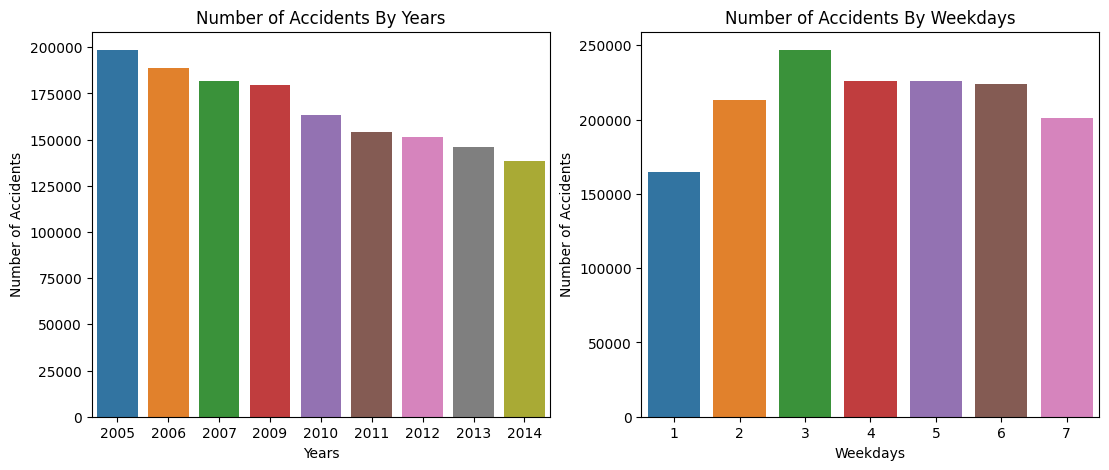

In [45]:
plt.figure(figsize = (13,5))

plt.subplot(1,2,1)

sns.barplot(x=years, y=ny)
plt.xlabel("Years")
plt.ylabel("Number of Accidents")
plt.title("Number of Accidents By Years")

plt.subplot(1,2,2)

sns.barplot(x=weeks, y=nw)
plt.xlabel("Weekdays")
plt.ylabel("Number of Accidents")
plt.title("Number of Accidents By Weekdays")

plt.show()

### Road types effect

In [59]:
rd = df["Road_Type"].value_counts()
rds = df["Road_Type"].unique()
count_rd=rd.values
rd

Single carriageway    1125286
Dual carriageway       221547
Roundabout             100237
One way street          30914
Slip road               15651
Unknown                  8322
Name: Road_Type, dtype: int64

In [60]:
count_rd

array([1125286,  221547,  100237,   30914,   15651,    8322])

Text(0.5, 1.0, 'Road Type effects on Accidents')

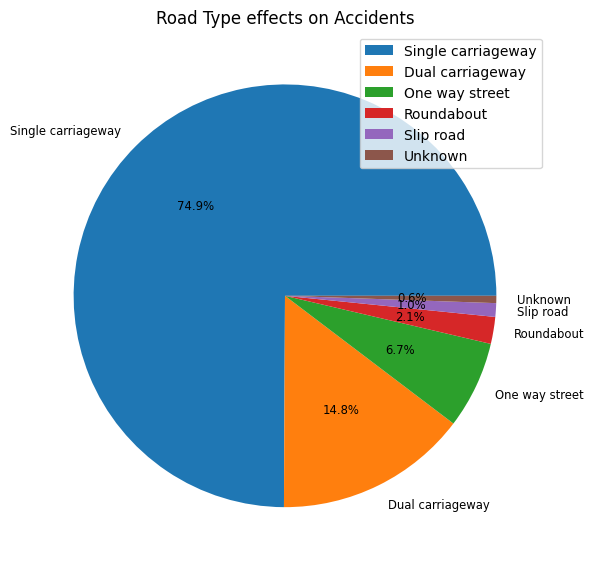

In [74]:
plt.figure(figsize=(15,15))
plt.subplot(1,2,1)
plt.pie(count_rd, labels=rds,autopct='%1.1f%%',textprops={"size": "small"})
plt.legend(loc ="upper right")
plt.title("Road Type effects on Accidents")

### Light Conditions & Weather Conditions


In [76]:
lc = df["Light_Conditions"].value_counts()
lcs = df["Light_Conditions"].unique()
count_lc = lc.values

In [100]:
lc


Daylight: Street light present               1100645
Darkness: Street lights present and lit       295948
Darkeness: No street lighting                  82479
Darkness: Street lighting unknown              15984
Darkness: Street lights present but unlit       6901
Name: Light_Conditions, dtype: int64

In [95]:
wc = df["Weather_Conditions"].value_counts()
wcs = df["Weather_Conditions"].unique()
count_wc = wc.values

In [125]:
count_wc

array([1203503,  177639,   33437,   26777,   20810,   18347,   11300,
          8184,    1960])

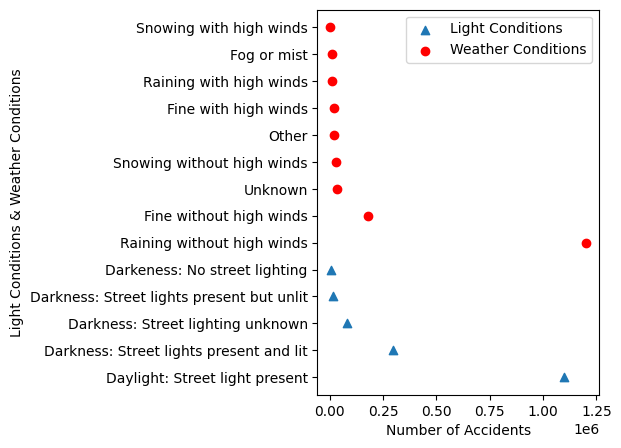

In [134]:
plt.figure(figsize=(8,5))
plt.subplot(1,2,1)
plt.scatter(count_lc,lcs, label="Light Conditions", marker='^')
plt.xlabel("Number of Accidents")
plt.ylabel("Light Conditions & Weather Conditions")
plt.scatter(count_wc,wcs, label="Weather Conditions", color='r', marker='o')
plt.legend()
plt.show()

In [147]:
df

,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Day_of_Week,Time,Road_Type,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Urban_or_Rural_Area,Year
0,2,1,1,3,17:42,Single carriageway,Daylight: Street light present,Raining without high winds,Wet/Damp,1,2005
1,3,1,1,4,17:36,Dual carriageway,Darkness: Street lights present and lit,Fine without high winds,Dry,1,2005
2,3,2,1,5,00:15,Single carriageway,Darkness: Street lights present and lit,Fine without high winds,Dry,1,2005
3,3,1,1,6,10:35,Single carriageway,Daylight: Street light present,Fine without high winds,Dry,1,2005
4,3,1,1,2,21:13,Single carriageway,Darkness: Street lighting unknown,Fine without high winds,Wet/Damp,1,2005
...,...,...,...,...,...,...,...,...,...,...,...
464692,2,2,1,1,22:20,Dual carriageway,Darkeness: No street lighting,Snowing without high winds,Snow,2,2014
464693,3,2,2,5,06:40,Dual carriageway,Darkeness: No street lighting,Fine without high winds,Snow,2,2014
464694,3,1,1,3,02:00,Single carriageway,Darkness: Street lights present and lit,Fine without high winds,Frost/Ice,2,2014
464695,2,3,2,4,06:55,Single carriageway,Darkeness: No street lighting,Raining without high winds,Wet/Damp,2,2014


## Categorization

In [153]:
from pandas.api.types import is_string_dtype

In [156]:
def data_cat(df):
    for n,c in df.items():
        if is_string_dtype(c):
            df[n] = c.astype("category").cat.as_ordered()

In [175]:
df.drop(["Time"], axis=1, inplace = True)

In [176]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1501957 entries, 0 to 464696
Data columns (total 10 columns):
 #   Column                   Non-Null Count    Dtype   
---  ------                   --------------    -----   
 0   Accident_Severity        1501957 non-null  int64   
 1   Number_of_Vehicles       1501957 non-null  int64   
 2   Number_of_Casualties     1501957 non-null  int64   
 3   Day_of_Week              1501957 non-null  int64   
 4   Road_Type                1501957 non-null  category
 5   Light_Conditions         1501957 non-null  category
 6   Weather_Conditions       1501957 non-null  category
 7   Road_Surface_Conditions  1501957 non-null  category
 8   Urban_or_Rural_Area      1501957 non-null  int64   
 9   Year                     1501957 non-null  int64   
dtypes: category(4), int64(6)
memory usage: 85.9 MB


In [182]:
df["Road_Surface_Conditions"]

0          Wet/Damp
1               Dry
2               Dry
3               Dry
4          Wet/Damp
            ...    
464692         Snow
464693         Snow
464694    Frost/Ice
464695     Wet/Damp
464696     Wet/Damp
Name: Road_Surface_Conditions, Length: 1501957, dtype: category
Categories (5, object): ['Dry' < 'Flood (Over 3cm of water)' < 'Frost/Ice' < 'Snow' < 'Wet/Damp']

In [203]:
def apply_cats(df,train):
    for n, c in df.items():
        if train[n].dtype == "category":
            df[n] = pd.Categorical(c, categories = train[n].cat.categories, order = True)

In [213]:
df["Road_Type"].cat.set_categories([
       'Dual carriageway',
       'One way street',
       'Roundabout',
       'Single carriageway',
       'Slip road',
       'Unknown'], ordered = True, inplace = True)

/usr/lib/python3/dist-packages/pandas/core/arrays/categorical.py:2631: FutureWarning: The `inplace` parameter in pandas.Categorical.set_categories is deprecated and will be removed in a future version. Removing unused categories will always return a new Categorical object.
  res = method(*args, **kwargs)


In [214]:
df["Light_Conditions"].cat.set_categories([
       'Daylight: Street light present', 
       'Darkness: Street lights present and lit',
       'Darkness: Street lights present but unlit',
       'Darkness: Street lighting unknown',
       'Darkeness: No street lighting'], ordered = True, inplace = True)

In [206]:
df["Weather_Conditions"].cat.set_categories([
       'Fine with high winds',
       'Fine without high winds',
       'Fog or mist',
       'Raining without high winds',
       'Snowing with high winds',
       'Snowing without high winds',
       'Other',
       'Unknown'], ordered = True, inplace = True)

In [208]:
df["Road_Surface_Conditions"].cat.set_categories([
       'Dry',
       'Wet/Damp'
       'Flood (Over 3cm of water)',
       'Snow'
       'Frost/Ice'], ordered = True, inplace = True)

In [209]:
df["Light_Conditions"].cat.codes

0         0
1         1
2         1
3         0
4         3
         ..
464692    4
464693    4
464694    1
464695    4
464696    0
Length: 1501957, dtype: int8

In [210]:
df.head()

,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Day_of_Week,Road_Type,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Urban_or_Rural_Area,Year
0,2,1,1,3,Single carriageway,Daylight: Street light present,Raining without high winds,NaN,1,2005
1,3,1,1,4,Dual carriageway,Darkness: Street lights present and lit,Fine without high winds,Dry,1,2005
2,3,2,1,5,Single carriageway,Darkness: Street lights present and lit,Fine without high winds,Dry,1,2005
3,3,1,1,6,Single carriageway,Daylight: Street light present,Fine without high winds,Dry,1,2005
4,3,1,1,2,Single carriageway,Darkness: Street lighting unknown,Fine without high winds,NaN,1,2005


In [240]:
data_rep = df.copy()
data_rep["Light_Conditions"] = df["Light_Conditions"].cat.codes +1
data_rep["Weather_Conditions"] = df["Weather_Conditions"].cat.codes +1
data_rep["Road_Type"] = df["Road_Type"].cat.codes +1
data_rep["Road_Surface_Conditions"] = df["Road_Surface_Conditions"].cat.codes +1 
data_rep.head()

,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Day_of_Week,Road_Type,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Urban_or_Rural_Area,Year
0,2,1,1,3,4,1,4,0,1,2005
1,3,1,1,4,1,2,2,1,1,2005
2,3,2,1,5,4,2,2,1,1,2005
3,3,1,1,6,4,1,2,1,1,2005
4,3,1,1,2,4,4,2,0,1,2005


In [241]:
data_rep.shape

(1501957, 10)

In [256]:
X = data_rep.drop(["Accident_Severity"],axis=1).values
y = data_rep["Accident_Severity"].values

In [257]:
from sklearn.model_selection import train_test_split
    
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.25, random_state =0)


## Random Forest Regresssion

In [258]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [259]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from math import sqrt
import time

start_time = time.time()

rf = RandomForestRegressor(n_estimators=150)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

trs = rf.score(X_train, y_train)
ts = rf.score(X_test, y_test)
rmse = sqrt(mean_squared_error(y_test, y_pred))

end_time = time.time()

print("Run time : ", end_time-start_time)

Run time :  336.9258027076721


In [260]:
print("training score :", trs)
print("test score :" , ts)
print("root mean squared error :", rmse)

training score : 0.12777212118724968
test score : 0.0010141234372468277
root mean squared error : 0.40176409050151357
